In [1]:
import pygmt
import geopandas as gpd
import rioxarray


In [2]:
grid = pygmt.datasets.load_earth_relief(resolution="05m", region=[-130, -65, 24, 52])
grid.rio.write_crs("epsg:4326", inplace=True)

<xarray.DataArray 'z' (lat: 337, lon: 781)> Size: 2MB
array([[-4623.5, -4609.5, -4604.5, ..., -5719. , -5776. , -5785.5],
       [-4604. , -4598. , -4564. , ..., -5792. , -5817.5, -5810. ],
       [-4546. , -4530. , -4517. , ..., -5825.5, -5841. , -5821. ],
       ...,
       [ -175. ,  -181.5,  -213.5, ...,   650.5,   642. ,   666. ],
       [ -141.5,  -135. ,  -136. , ...,   612. ,   606.5,   607. ],
       [ -131. ,  -123.5,  -118.5, ...,   610.5,   605. ,   615. ]])
Coordinates:
  * lat          (lat) float64 3kB 24.0 24.08 24.17 24.25 ... 51.83 51.92 52.0
  * lon          (lon) float64 6kB -130.0 -129.9 -129.8 ... -65.17 -65.08 -65.0
    spatial_ref  int64 8B 0
Attributes:
    Conventions:       CF-1.7
    title:             
    history:           gmt grdblend @earth_relief_05m_g/ -R-130/-65/24/52 -I0...
    description:       IGPP Earth relief
    long_name:         z
    units:             meters
    vertical_datum:    EGM96
    horizontal_datum:  WGS84

In [3]:
path='tl_2023_us_state/tl_2023_us_state.shp'
df = gpd.read_file(path)

ny_shape = df[df['NAME'] == 'New York']
ny_shape = ny_shape.to_crs("EPSG:4326")

In [58]:
ny_shape

,REGION,DIVISION,STATEFP,STATENS,GEOID,GEOIDFQ,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
index,,,,,,,,,,,,,,,,
38,1,2,36,01779796,36,0400000US36,NY,New York,00,G4000,A,122049078273,19256833049,+42.9133974,-075.5962723,"MULTIPOLYGON (((-74.72623 44.99486, -74.72258 ..."


In [4]:
clipped = grid.rio.clip(ny_shape.geometry.values, ny_shape.crs, drop=False, invert=False)

coast [ERROR]: Colorname bblack not recognized!
coast [WARNING]: Representation of pen color (bblack) not recognized. Using default.
/var/folders/dd/_xm_pbpd3flgbvbnt7qhd70snnbpj_/T/ipykernel_3905/1927080796.py:17: FutureWarning: The 'interval' parameter has been deprecated since v0.12.0 and will be removed in v0.16.0. Please use 'levels' instead.
  fig.grdcontour(clipped, annotation=250, interval=50)


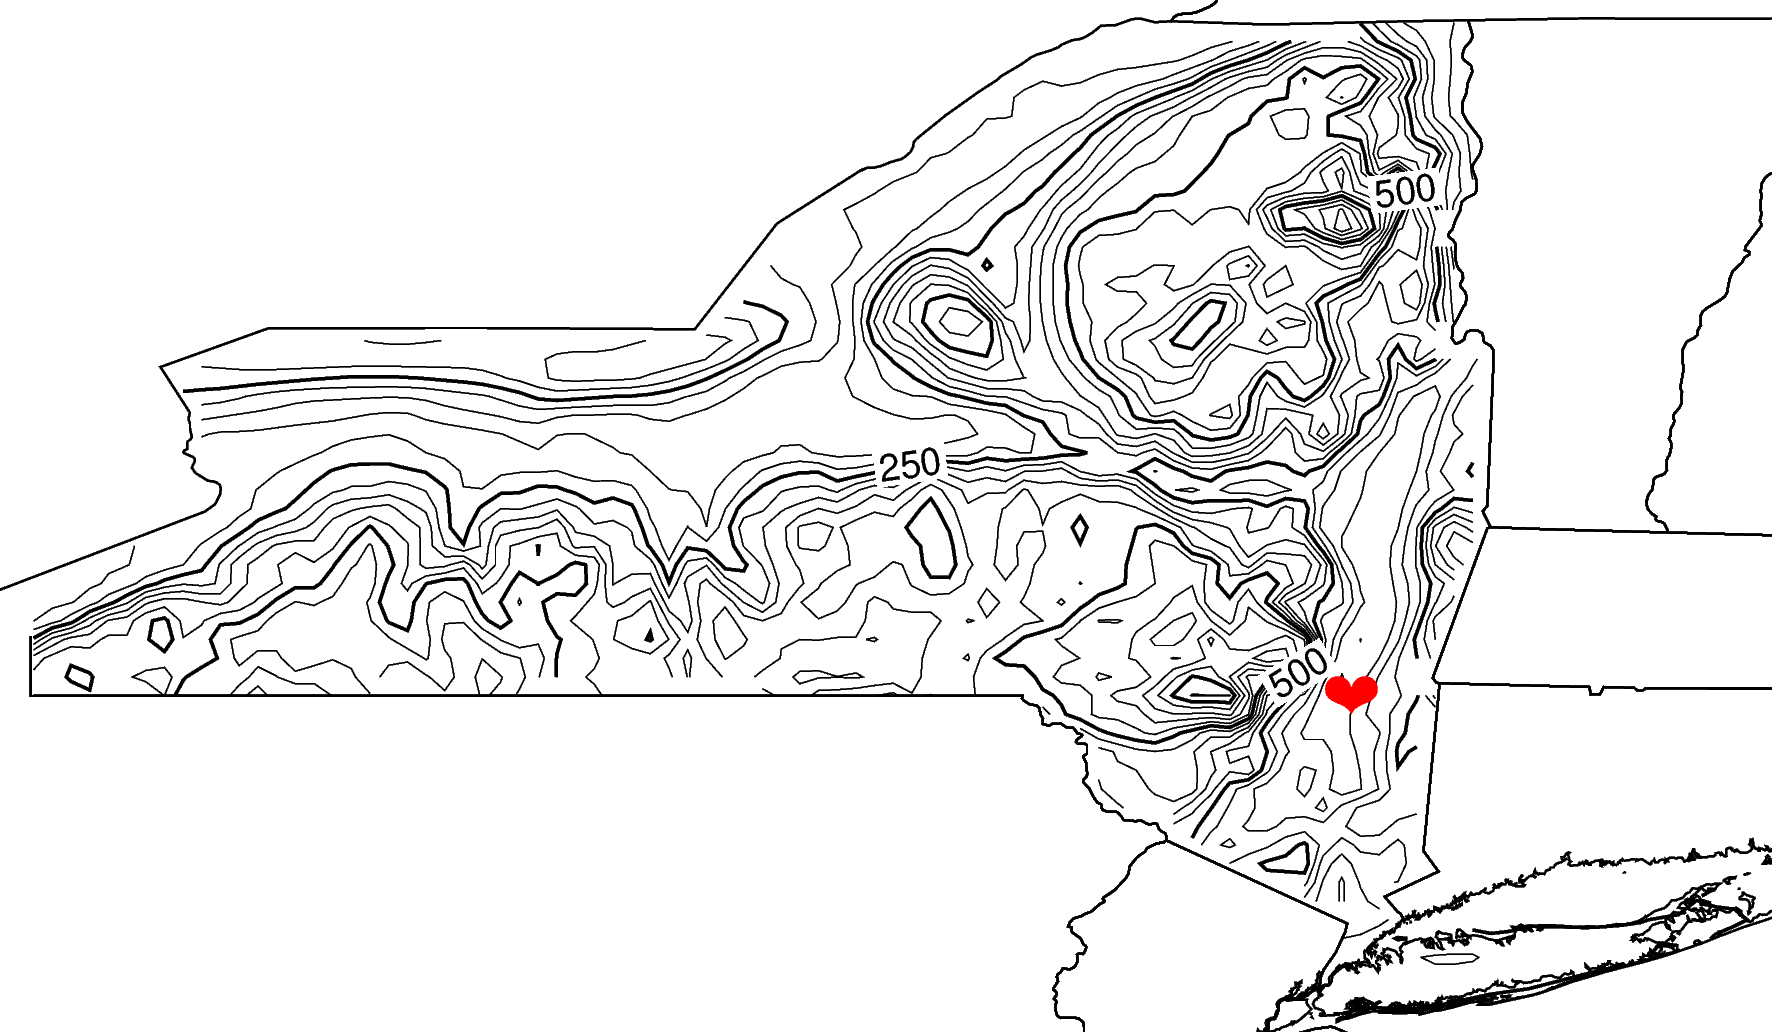

In [43]:
import pygmt

fig = pygmt.Figure()

# Define the region of interest (covers the area around New York)
region = [-79.9, -72, 40.5, 45.1]

# Plot the coastline and the state borders
fig.coast(
    shorelines="1/0.5p,black",  # Set shoreline properties
    region=region,              # Set region
    borders=["1/0.5p,black", "2/0.5p,bblack"],  # Outline country borders (code 1) and state borders (code 2)
    #frame="af",                 # Automatic frame with annotations
)

# Add contours (assuming `clipped` is the correct grid file)
fig.grdcontour(clipped, annotation=250, interval=50)

fig.text(text="\u2764",x=-73.8754, y=41.9948,font="15p,red")


# Display the figure
fig.show()


coast [WARNING]: No country code matching UnitedStates (skipped)
/var/folders/dd/_xm_pbpd3flgbvbnt7qhd70snnbpj_/T/ipykernel_3905/816757983.py:20: FutureWarning: The 'interval' parameter has been deprecated since v0.12.0 and will be removed in v0.16.0. Please use 'levels' instead.
  fig.grdcontour(clipped, annotation=250, interval=50, region=region)


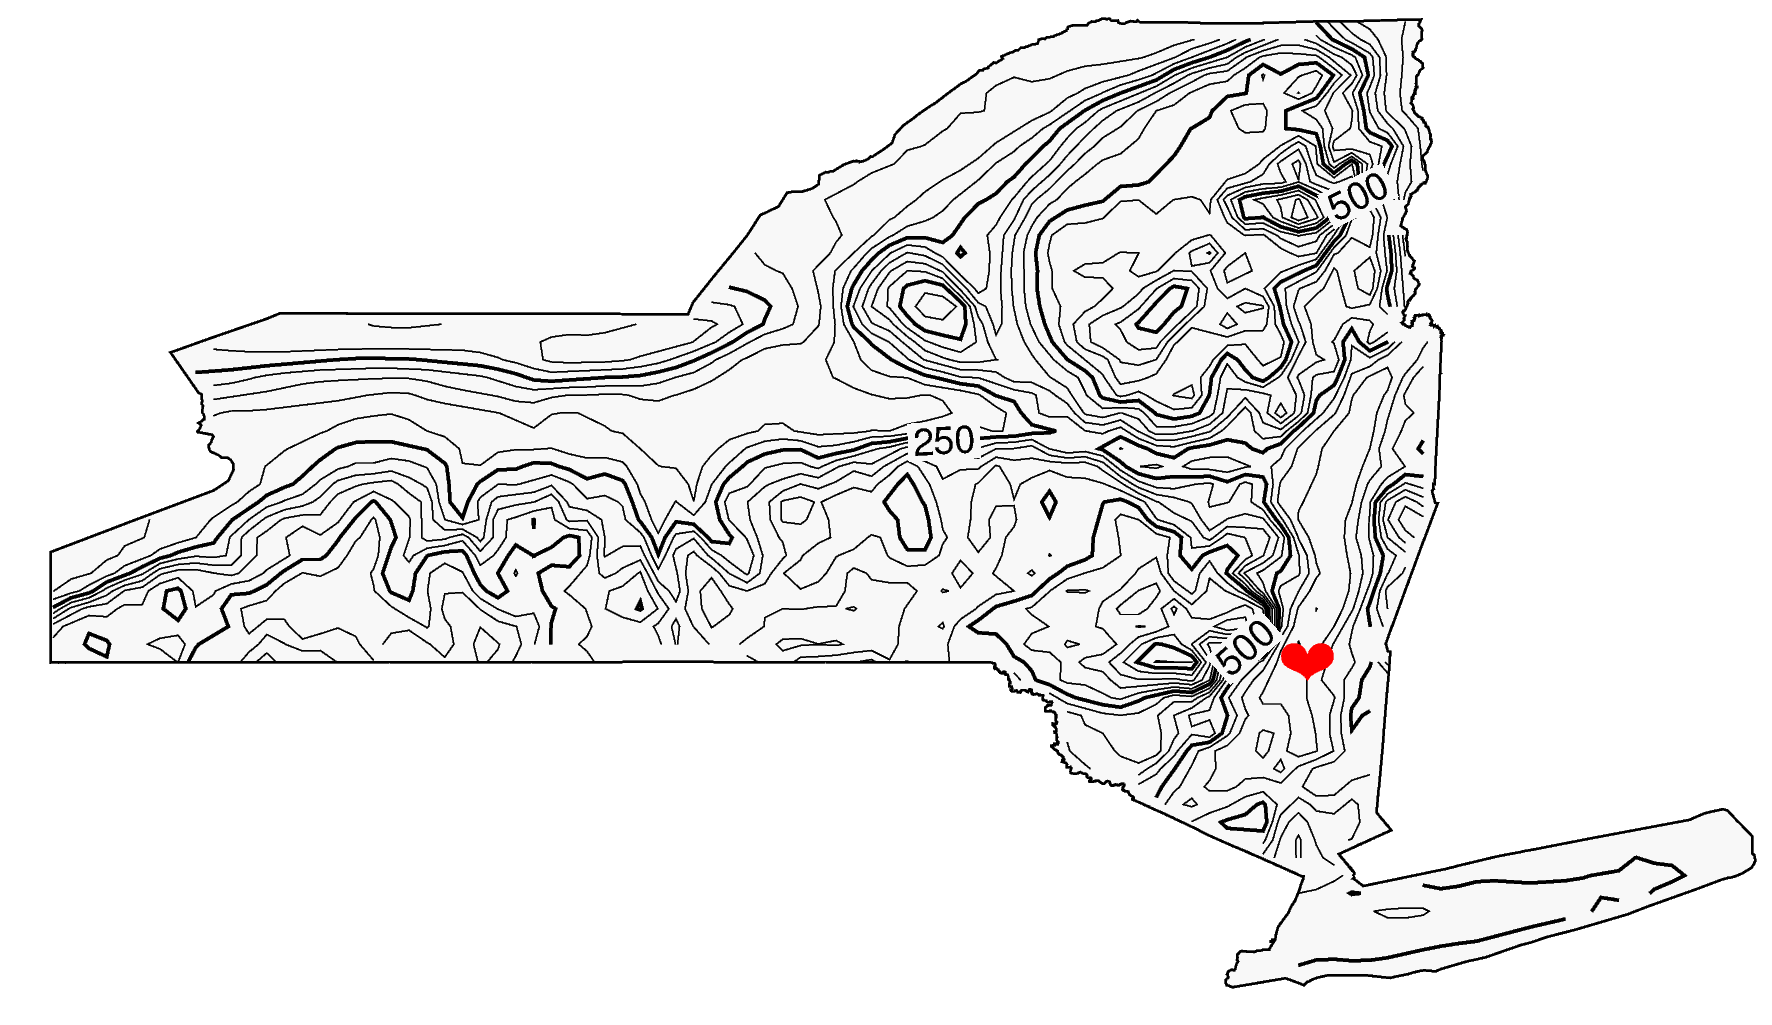

In [70]:
fig = pygmt.Figure()

# Define the region of interest (covers the area around New York)
region = [-80, -71.7, 40.3, 45.1]

# Set up the map
fig.coast(
    region=region,
    water="white",
)

# Plot the New York state boundary
fig.plot(data=ny_shape, pen="0.5p", region=region, fill="#f8f8f8")


# Add contours (assuming `clipped` is the correct grid file)
fig.grdcontour(clipped, annotation=250, interval=50, region=region)

fig.text(text="\u2764",x=-73.8754, y=41.9948,font="15p,red")

# Display the figure
fig.show()
